### **Laboratorio 1**
### **Catedrático:** Ing. Pren Biba - Text Mining & Image Recognition
### **Marvin Fernando Carrillo Robles - 14003303**	 

# Problema 1

> Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes puntos:
* > Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
* > Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
* > Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
* > Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
* > Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
* > Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.

In [24]:
# Carga de Librerías
from PIL import Image
import numpy as np
from IPython.display import display


In [25]:
#Función 
def aplicar_color(imagen, color):
    
    img_array = np.array(imagen)
    resultado = np.zeros_like(img_array)

    # Aplicar colores de acuerdo al parámetro definido
    if color == 1:  # Azul
        resultado[:, :, 2] = img_array[:, :, 2]
    elif color == 2:  # Verde
        resultado[:, :, 1] = img_array[:, :, 1]
    elif color == 3:  # Rojo
        resultado[:, :, 0] = img_array[:, :, 0]
    elif color == 10:  # Rojo y verde
        resultado[:, :, 0] = img_array[:, :, 0]  # Rojo
        resultado[:, :, 1] = img_array[:, :, 1]  # Verde
    elif color == 20:  # Verde y azul
        resultado[:, :, 1] = img_array[:, :, 1]  # Verde
        resultado[:, :, 2] = img_array[:, :, 2]  # Azul
    elif color == 30:  # Azul y rojo
        resultado[:, :, 0] = img_array[:, :, 0]  # Rojo
        resultado[:, :, 2] = img_array[:, :, 2]  # Azul
    else:
        raise ValueError("El valor de color no es válido.")

    # Conversión del Array de vuelta
    imagen_resultado = Image.fromarray(resultado)
    return imagen_resultado


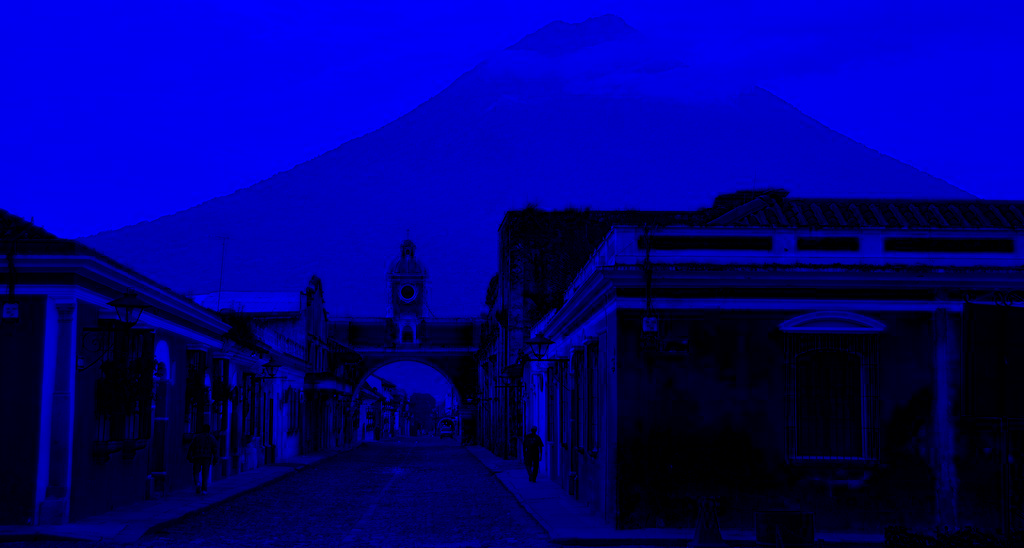

In [26]:
# Transformación de la Imagen
if __name__ == "__main__":
    
    imagen = Image.open("p1.jpg")   
    color = int(input("Ingresa el valor de color (1, 2, 3, 10, 20 o 30): "))
    imagen_modificada = aplicar_color(imagen, color)
    
    # Salida
    display(imagen_modificada)   

# Problema 2

> En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises (imagen1, imagen2, perro) estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se construya la imagen original a color.

In [4]:
# Carga de Librerías
from PIL import Image
import numpy as np
from IPython.display import display


In [5]:
# Función
def reconstruir_imagen_color(gray_azul, gray_rojo, gray_verde):
    
    # Conversión de imágenes a arrays
    azul_array = np.array(gray_azul)
    rojo_array = np.array(gray_rojo)
    verde_array = np.array(gray_verde)

    # Crear un array vacío para la imagen de color
    imagen_color = np.zeros((azul_array.shape[0], azul_array.shape[1], 3), dtype=np.uint8)

    # Asignación de los canales de color
    imagen_color[:, :, 0] = rojo_array  # Rojo
    imagen_color[:, :, 1] = verde_array  # Verde
    imagen_color[:, :, 2] = azul_array  # Azul

    # Convertir el array de vuelta
    imagen_resultante = Image.fromarray(imagen_color, 'RGB')
    return imagen_resultante



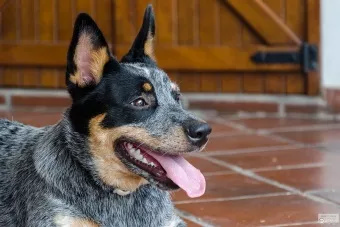

In [6]:
# Transformación de la Imagen
if __name__ == "__main__":
     
    gray_azul = Image.open("perro_salida_gray_azul.jpg")   
    gray_rojo = Image.open("perro_salida_gray_rojo.jpg")   
    gray_verde = Image.open("perro_salida_gray_verde.jpg")   
    
# Reconstrucción de la Imagen
imagen_color = reconstruir_imagen_color(gray_azul, gray_rojo, gray_verde)

# Salida
display(imagen_color)

# Problema 3

> Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

In [7]:
# Carga de Librerías
from PIL import Image
import numpy as np
from IPython.display import display



In [8]:
# Función 
def crear_escala_grises_3d(imagen):
    
    # Conversión de la imagen a escala de grises
    gris_array = np.array(imagen.convert("L"))   

    # Imágenes para cada canal 
    rojo_array = np.zeros_like(gris_array)
    verde_array = np.zeros_like(gris_array)
    azul_array = np.zeros_like(gris_array)

    # Asignación de valores de gris a Rojo, Verde y Azul 
    rojo_array[:] = gris_array
    verde_array[:] = gris_array
    azul_array[:] = gris_array

      # Convertir el array de vuelta
    imagen_rojo = Image.fromarray(rojo_array, 'L')
    imagen_verde = Image.fromarray(verde_array, 'L')
    imagen_azul = Image.fromarray(azul_array, 'L')

    return imagen_rojo, imagen_verde, imagen_azul



In [9]:
# Transformación de la Imagen

imagen = Image.open("p3.jpg")  

# Creación de las imágenes a escala de grises
imagen_rojo, imagen_verde, imagen_azul = crear_escala_grises_3d(imagen)


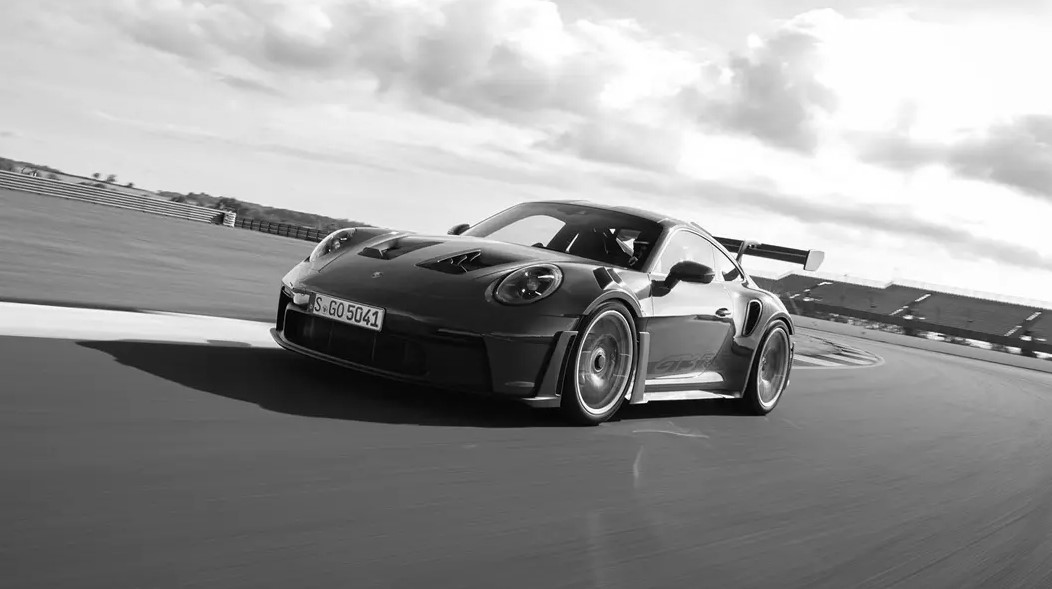

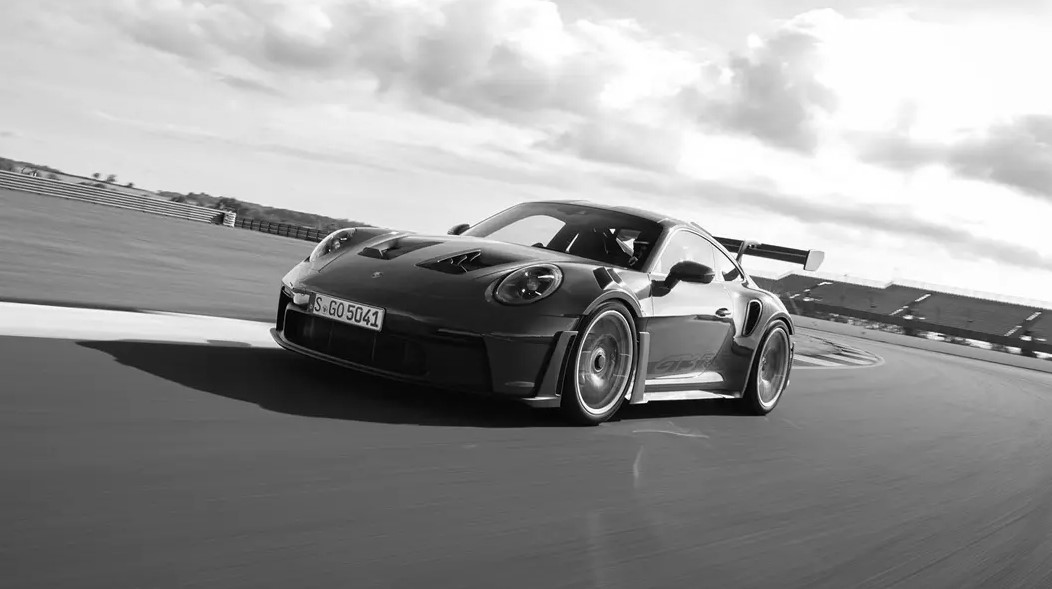

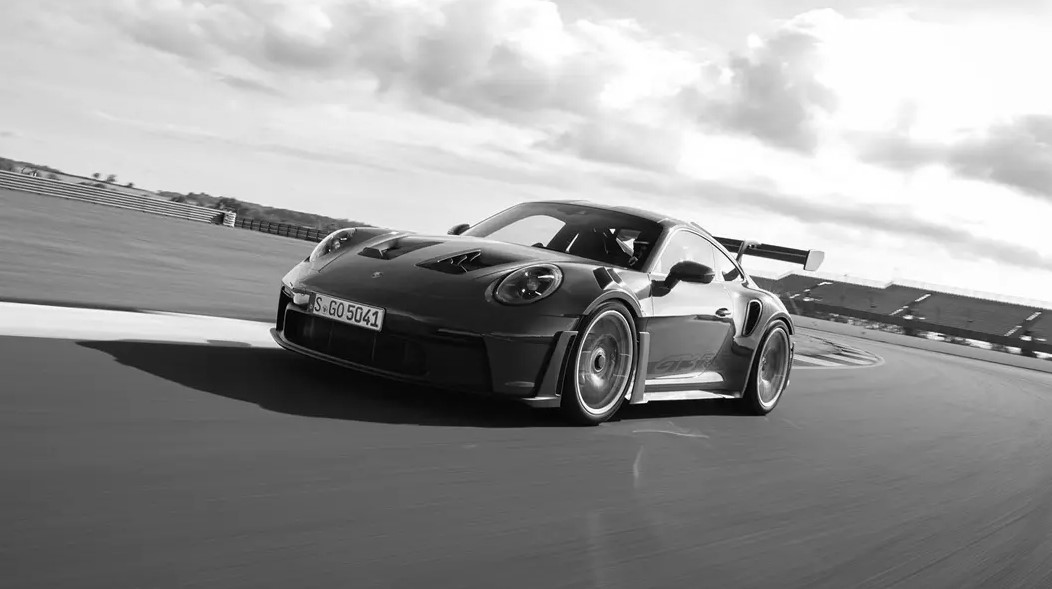

In [10]:
# Salida
display(imagen_rojo)
display(imagen_verde)
display(imagen_azul)

# Problema 4

> Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media de la distribución.

In [11]:
# Carga de Librerías
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display



In [12]:
# Función 
def mostrar_histogramas(imagen_path):
     
    imagen = Image.open(imagen_path)
    
    # Conversión de la imagen a un array
    img_array = np.array(imagen)
    
    # Obtención de los canales de color
    rojo = img_array[:, :, 0]
    verde = img_array[:, :, 1]
    azul = img_array[:, :, 2]
    
    # Cálculo de la imagen ena escala de grises, con prómedio aritmético 
    gris = (rojo + verde + azul) / 3
    gris = gris.astype(np.uint8)   

    # Cálculo de los histogramas
    hist_rojo, bins_rojo = np.histogram(rojo.flatten(), bins=256, range=[0, 256])
    hist_verde, bins_verde = np.histogram(verde.flatten(), bins=256, range=[0, 256])
    hist_azul, bins_azul = np.histogram(azul.flatten(), bins=256, range=[0, 256])
    hist_gris, bins_gris = np.histogram(gris.flatten(), bins=256, range=[0, 256])

    # Cálculo de la media * canal
    media_rojo = np.mean(rojo)
    media_verde = np.mean(verde)
    media_azul = np.mean(azul)
    media_gris = np.mean(gris)

    # Creación de la figura
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Histograma - Canal rojo
    axes[0, 0].bar(bins_rojo[:-1], hist_rojo, color='red', width=1)
    axes[0, 0].axvline(media_rojo, color='black', linestyle='dashed', linewidth=1)
    axes[0, 0].text(media_rojo + 5, max(hist_rojo) * 0.8, f'Media: {media_rojo:.2f}', color='black')
    axes[0, 0].set_title('Histograma - Canal Rojo')

    # Histograma - Canal verde
    axes[0, 1].bar(bins_verde[:-1], hist_verde, color='green', width=1)
    axes[0, 1].axvline(media_verde, color='black', linestyle='dashed', linewidth=1)
    axes[0, 1].text(media_verde + 5, max(hist_verde) * 0.8, f'Media: {media_verde:.2f}', color='black')
    axes[0, 1].set_title('Histograma - Canal Verde')

    # Histograma - Canal azul
    axes[1, 0].bar(bins_azul[:-1], hist_azul, color='blue', width=1)
    axes[1, 0].axvline(media_azul, color='black', linestyle='dashed', linewidth=1)
    axes[1, 0].text(media_azul + 5, max(hist_azul) * 0.8, f'Media: {media_azul:.2f}', color='black')
    axes[1, 0].set_title('Histograma - Canal Azul')

    # Histograma - Escala de grises
    axes[1, 1].bar(bins_gris[:-1], hist_gris, color='gray', width=1)
    axes[1, 1].axvline(media_gris, color='black', linestyle='dashed', linewidth=1)
    axes[1, 1].text(media_gris + 5, max(hist_gris) * 0.8, f'Media: {media_gris:.2f}', color='black')
    axes[1, 1].set_title('Histograma - Escala de Grises')

    
    plt.tight_layout()

     
    plt.show()   

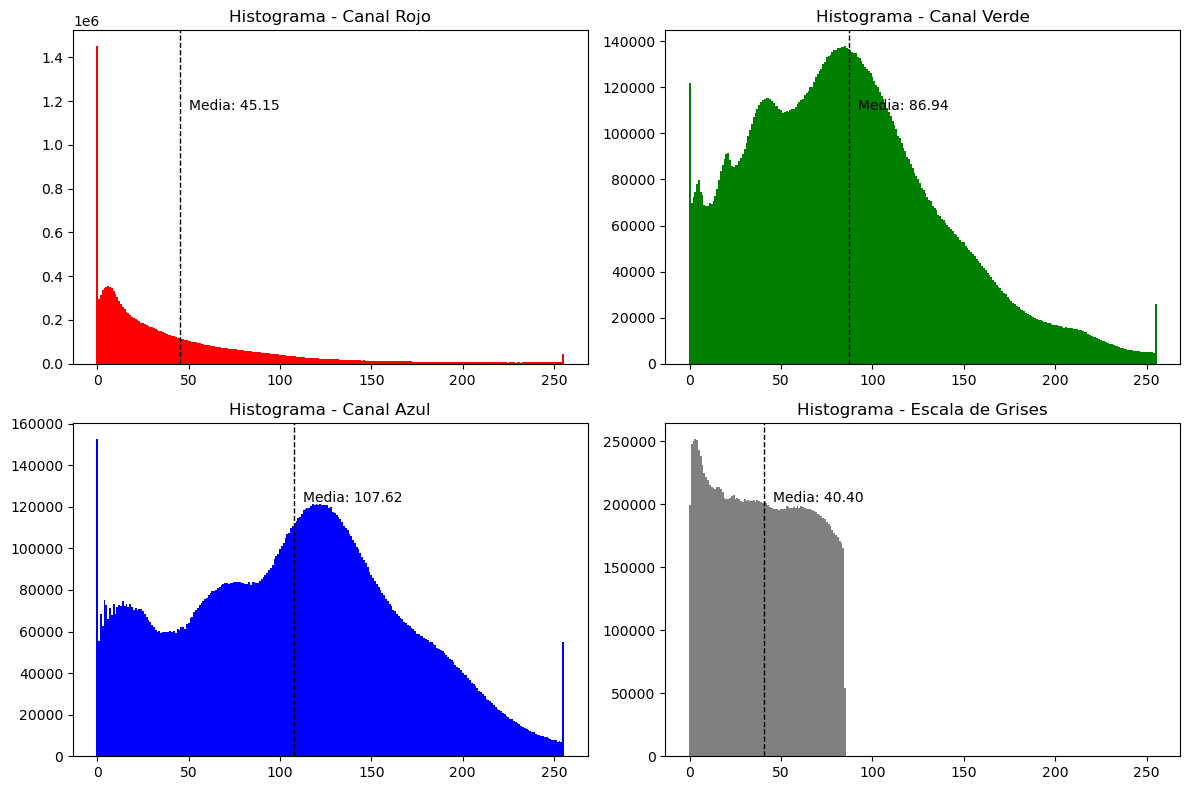

In [13]:
# Salida de Histogramas 
if __name__ == "__main__":
    mostrar_histogramas("p4.jpg")   

# Problema 5

## Enfoque de escala de grises ponderado

> El enfoque de escala de grises ponderado consiste en convertir una imagen en color a escala de grises utilizando una media ponderada de los componentes de color (rojo, verde y azul). Este método tiene en cuenta la sensibilidad del ojo humano a diferentes longitudes de onda de luz. La fórmula más comúnmente utilizada para este propósito es:

> ***Y=R×0.3+G×0.59+B×0.11***

> En esta ecuación, los coeficientes (0.3, 0.59, 0.11) representan la contribución relativa de cada canal de color a la luminancia percibida. Esto significa que el canal verde tiene mayor peso porque el ojo humano es más sensible a la luz verde, seguido del rojo y luego del azul. Este enfoque permite que la imagen resultante en escala de grises preserve mejor los detalles visuales que son más relevantes para la percepción humana

In [14]:
# Carga de Librerías
from PIL import Image
import numpy as np
from IPython.display import display


In [15]:
# Funcion de Ejemplo

def escala_grises_ponderada(imagen_path):
     
    imagen = Image.open(imagen_path)
    
    # Conversión de la imagen a un array 
    img_array = np.array(imagen)

    # Aplicación de la fórmula de escala de grises ponderada
    gris_array = (img_array[:, :, 0] * 0.3 +  # Rojo
                  img_array[:, :, 1] * 0.59 +  # Verde
                  img_array[:, :, 2] * 0.11)    # Azul

     
    gris_array = gris_array.astype(np.uint8)

    # Convertir el array de vuelta
    imagen_gris = Image.fromarray(gris_array, 'L')
    
    return imagen_gris


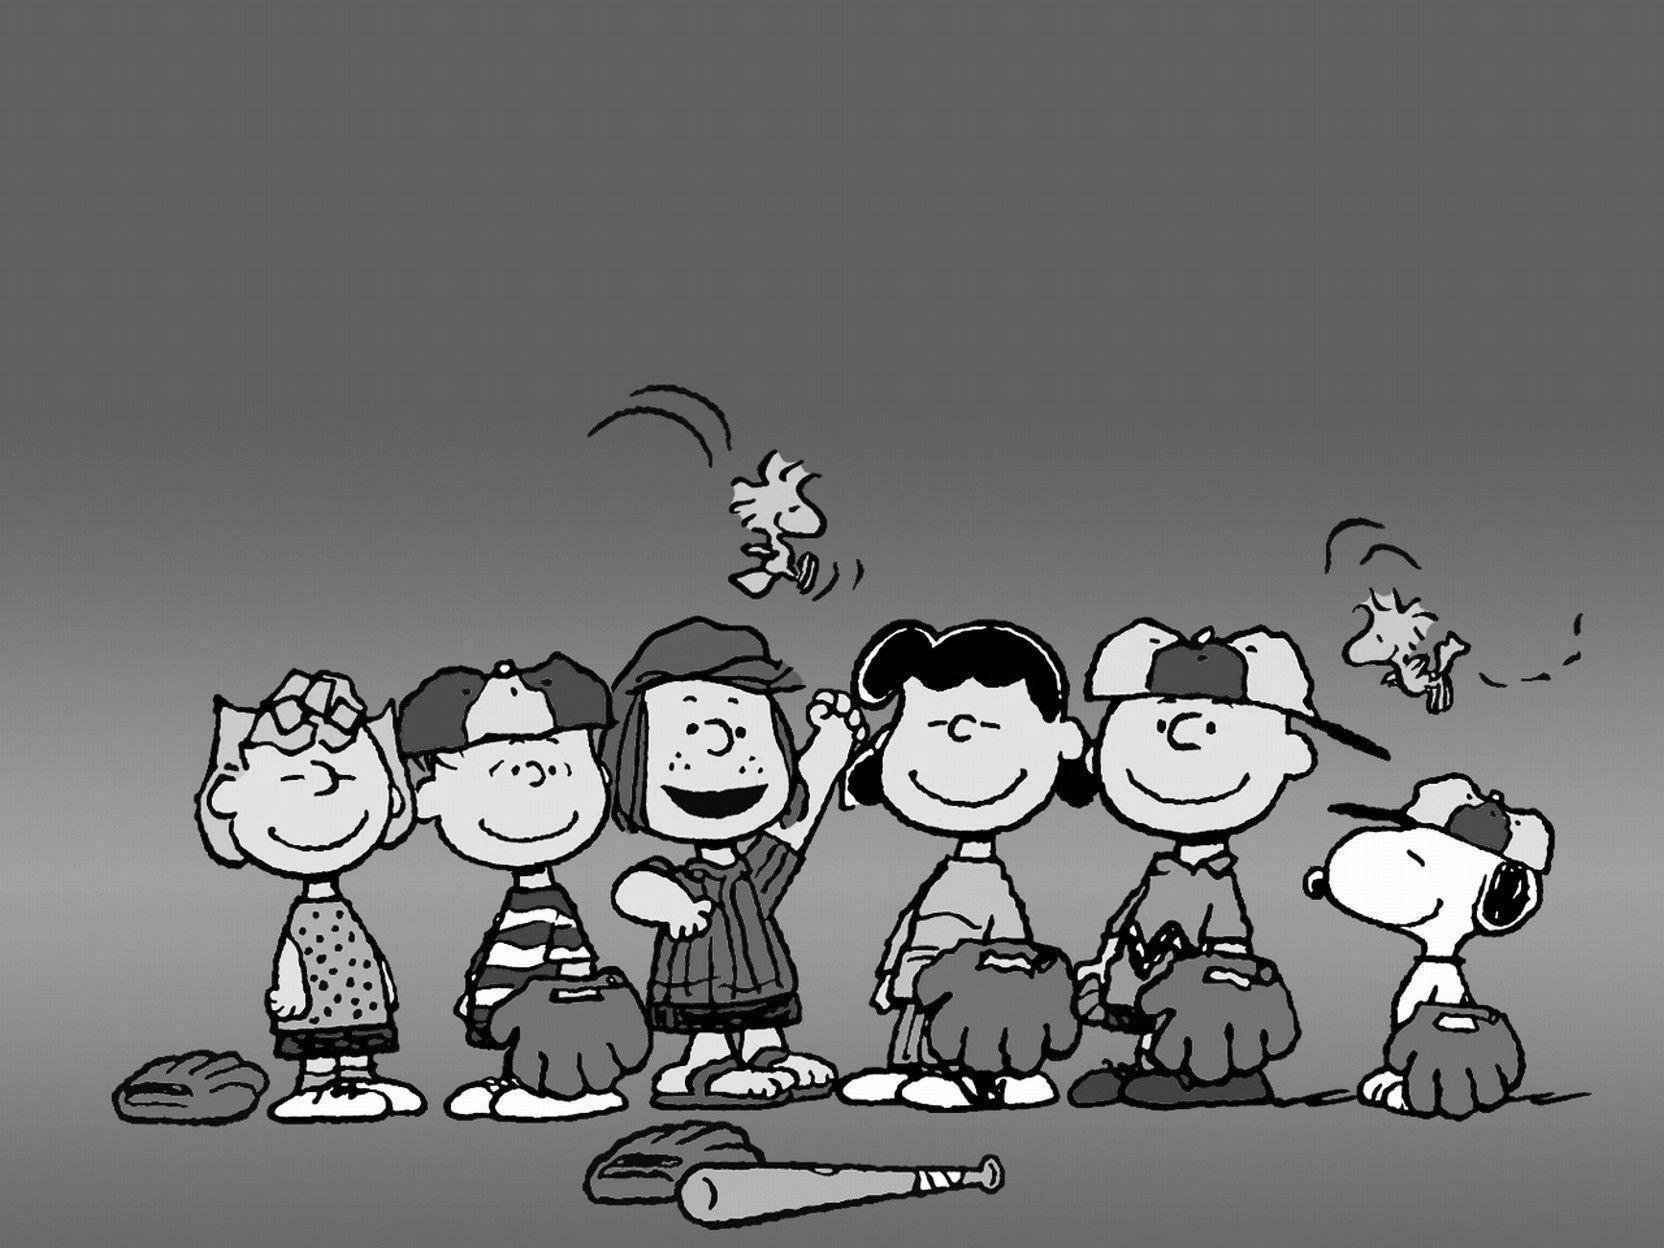

In [16]:
# Salida
if __name__ == "__main__":
     
    imagen_path = "p5.jpg"   
    
    # Conversión de la imagen a escala de grises ponderada
    imagen_gris = escala_grises_ponderada(imagen_path)
    
    
    display(imagen_gris)

# Problema 6

## Espacio de color HSV

### **Espacio de color HSV (Hue, Saturation, Value)**
> Es un modelo de color que representa los colores de una manera más intuitiva para los humanos en comparación con el modelo RGB (Rojo, Verde, Azul). En el espacio HSV:
> * ***Hue (Tono)***: Representa el color en sí mismo, medido como un ángulo en un círculo cromático, donde 0° corresponde al rojo, 120° al verde y 240° al azul. Los valores de tono varían entre 0° y 360°.
> * ***Saturation (Saturación)***: Indica la pureza del color. Un valor de saturación del 100% significa un color puro, mientras que un valor de 0% indica un gris (sin color).
> * ***Value (Valor)***: También conocido como brillo, representa la luminosidad del color. Un valor de 0% significa negro, y 100% representa el color más brillante posible.

### **Mapeo de Colores al Espacio HSV**
> Para mapear colores al espacio HSV, se utilizan fórmulas que convierten los componentes RGB a HSV. A continuación, se describe el proceso:
> * ***Normalización***: Los valores de los componentes RGB se normalizan en el rango de 0 a 1.
> * ***Cálculo del Tono (H)***: Se determina el tono según la relación entre los valores de R, G y B.
> * ***Cálculo de la Saturación (S)***: Se calcula la saturación en función de la diferencia entre el componente de color más alto y el más bajo.
> * ***Cálculo del Valor (V)***: Se determina el valor como el componente de color más alto.

In [17]:
# Carga de Librerías
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display



In [18]:
# Función 
def rgb_a_hsv(imagen_path):
    
    imagen = Image.open(imagen_path)
    
    # Conversión de  la imagen a un array 
    img_array = np.array(imagen) / 255 
    
    # Arrays para H, S y V
    h = np.zeros_like(img_array[:, :, 0])
    s = np.zeros_like(img_array[:, :, 0])
    v = np.zeros_like(img_array[:, :, 0])
    
    # Cálculo de H, S y V
    max_rgb = np.max(img_array, axis=2)
    min_rgb = np.min(img_array, axis=2)
    delta = max_rgb - min_rgb

    # Cálculo de H
    h[delta != 0] = np.where(
        max_rgb[delta != 0] == img_array[:, :, 0][delta != 0],
        (60 * ((img_array[:, :, 1][delta != 0] - img_array[:, :, 2][delta != 0]) / delta[delta != 0]) % 6),
        np.where(
            max_rgb[delta != 0] == img_array[:, :, 1][delta != 0],
            (60 * ((img_array[:, :, 2][delta != 0] - img_array[:, :, 0][delta != 0]) / delta[delta != 0]) + 2),
            (60 * ((img_array[:, :, 0][delta != 0] - img_array[:, :, 1][delta != 0]) / delta[delta != 0]) + 4)
        )
    )
    
    # Cálculo de S
    s[max_rgb != 0] = delta[max_rgb != 0] / max_rgb[max_rgb != 0]
    
    # Cálculo de V
    v = max_rgb

    # Conversión de H, S y V a un rango válido
    h = (h / 360.0)  # Normalización de H 
    s = (s)           
    v = (v)           

    # Componentes H, S y V
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.title('Tono (H)')
    plt.imshow(h, cmap='hsv')
    
    plt.subplot(1, 3, 2)
    plt.title('Saturación (S)')
    plt.imshow(s, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title('Valor (V)')
    plt.imshow(v, cmap='gray')
    
    plt.tight_layout()
    plt.show()



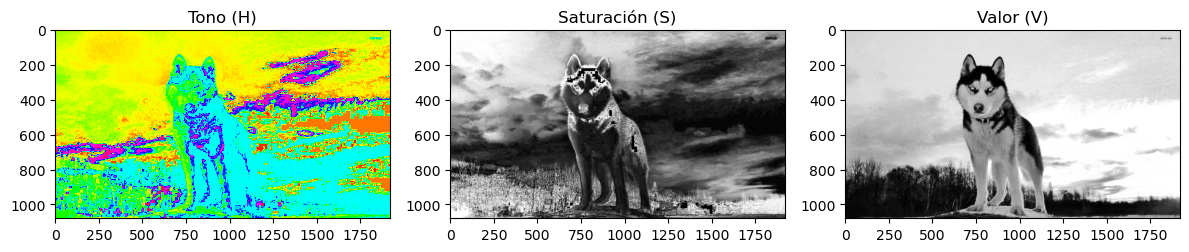

In [19]:
# Salida 
if __name__ == "__main__":
    rgb_a_hsv("p6.jpg")   